# Title

In [ ]:
{
    "url": "https://twitter.com/ArjunSinghPanam/status/1364506249291784198",
    "date": "2021-02-24T09:23:35+00:00",
    "content": "The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. \n\n@narendramodi @DelhiPolice Shame on you. \n\n#ModiDontSellFarmers \n#FarmersProtest \n#FreeNodeepKaur https://t.co/es3kn0IQAF",
    "renderedContent": "The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. \n\n@narendramodi @DelhiPolice Shame on you. \n\n#ModiDontSellFarmers \n#FarmersProtest \n#FreeNodeepKaur twitter.com/ravisinghka/st\u2026",
    "id": 1364506249291784198,
    "user":{
        "username": "ArjunSinghPanam",
        "displayname": "Arjun Singh Panam",
        "id": 45091142,
        "description": "Global Citizen, Actor, Director: Sky is the roof above my head, the world is the road I travel, love is my food & mother earth is my bed. Roy in @CosmosMovie",
        "rawDescription": "Global Citizen, Actor, Director: Sky is the roof above my head, the world is the road I travel, love is my food & mother earth is my bed. Roy in @CosmosMovie",
        "descriptionUrls": [],
        "verified": false,
        "created": "2009-06-06T07:50:57+00:00",
        "followersCount": 603,
        "friendsCount": 311,
        "statusesCount": 17534,
        "favouritesCount": 4269,
        "listedCount": 23,
        "mediaCount": 1211,
        "location": "",
        "protected": false,
        "linkUrl": "https://www.cosmosmovieofficial.com",
        "linkTcourl": "https://t.co/3uaoV3gCt3",
        "profileImageUrl": "https://pbs.twimg.com/profile_images/1215541746492461056/3De61YoQ_normal.jpg",
        "profileBannerUrl": "https://pbs.twimg.com/profile_banners/45091142/1612601766",
        "url": "https://twitter.com/ArjunSinghPanam"
    },
    "outlinks": ["https://twitter.com/ravisinghka/status/1364150844757860352"],
    "tcooutlinks": ["https://t.co/es3kn0IQAF"],
    "replyCount": 0,
    "retweetCount": 0,
    "likeCount": 0, "quoteCount": 0,
    "conversationId": 1364506249291784198,
    "lang": "en",
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "sourceUrl": "http://twitter.com/download/iphone",
    "sourceLabel": "Twitter for iPhone",
    "media": null,
    "retweetedTweet": null,
}

En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

In [1]:
file_path = "../data/farmers-protest-tweets-2021-2-4.json"

In [2]:
from q1_memory import q1_memory

print(q1_memory(file_path))

[(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]


In [3]:
%load_ext memory_profiler

In [4]:
%mprun -f q1_memory q1_memory(file_path)

Filename: c:\Users\santiago.codaro\Downloads\challenge_DE\src\q1_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     6     67.0 MiB     67.0 MiB           1   def q1_memory(file_path: str) -> List[Tuple[datetime.date, str]]:
     7                                             # Step 1: Initialize counters
     8     67.0 MiB      0.0 MiB           1       date_tweet_count = Counter()
     9     67.0 MiB      0.0 MiB           1       date_user_count = defaultdict(Counter)
    10                                             
    11                                             # Step 2: Read and process the file line-by-line
    12     67.0 MiB      0.0 MiB           1       with open(file_path, 'r') as file:
    13     73.0 MiB    -37.5 MiB      117408           for line in file:
    14     73.0 MiB    -35.2 MiB      117407               tweet = json.loads(line.strip())
    15                                                     
    16     73.0 MiB    -38.7 MiB   

Observaciones:

- Inicialización (Líneas 8-9): Estas líneas no consumen memoria adicional.
- Lectura y procesamiento del archivo (Líneas 12-21):
    - El incremento significativo de memoria está en la Línea 13 (82.0 MiB), lo que indica el consumo de memoria al leer el archivo.
    - json.loads(line.strip()) en la Línea 14 también muestra un incremento de memoria, lo cual es esperado al analizar cadenas JSON.
- Encontrar las 10 fechas principales (Líneas 24-30): Esta parte no muestra cambios significativos en la memoria, lo que indica que las operaciones en Counter y defaultdict son eficientes en cuanto a memoria.

### Time

Ahora vamos a hacer un profiling the tiempo.

py-spy ya está incluido en requirements.txt




Esta es la ejecución de la función sin profiling:

In [6]:
from q1_time import q1_time

print(q1_time(file_path))

[(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]


A continuación, se vuelve a ejecutar la función pero con el profiling:

In [5]:
import subprocess
import os
import time

# Get the PID of the current Jupyter Notebook kernel
pid = os.getpid()
print(f"Jupyter Notebook kernel PID: {pid}")

# Define the command to run py-spy
command = ["py-spy", "record", "-o", "profile.svg", "--pid", str(pid), "--duration", "20"]

# Start profiling in the background
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("Profiling in progress...")

# Allow some time for profiling setup (if needed)
time.sleep(1)

# Execute the function you want to profile
print(q1_time(file_path))

# Wait for the profiling process to complete
process.communicate()

print("Profiling complete. Output saved to profile.svg")


Jupyter Notebook kernel PID: 28008
Profiling in progress...
[(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]
Profiling complete. Output saved to profile.svg


Ya se puede ver el resultado del profiling en profile.svg.

Este fue el resultado del profiling de la función q1_time:

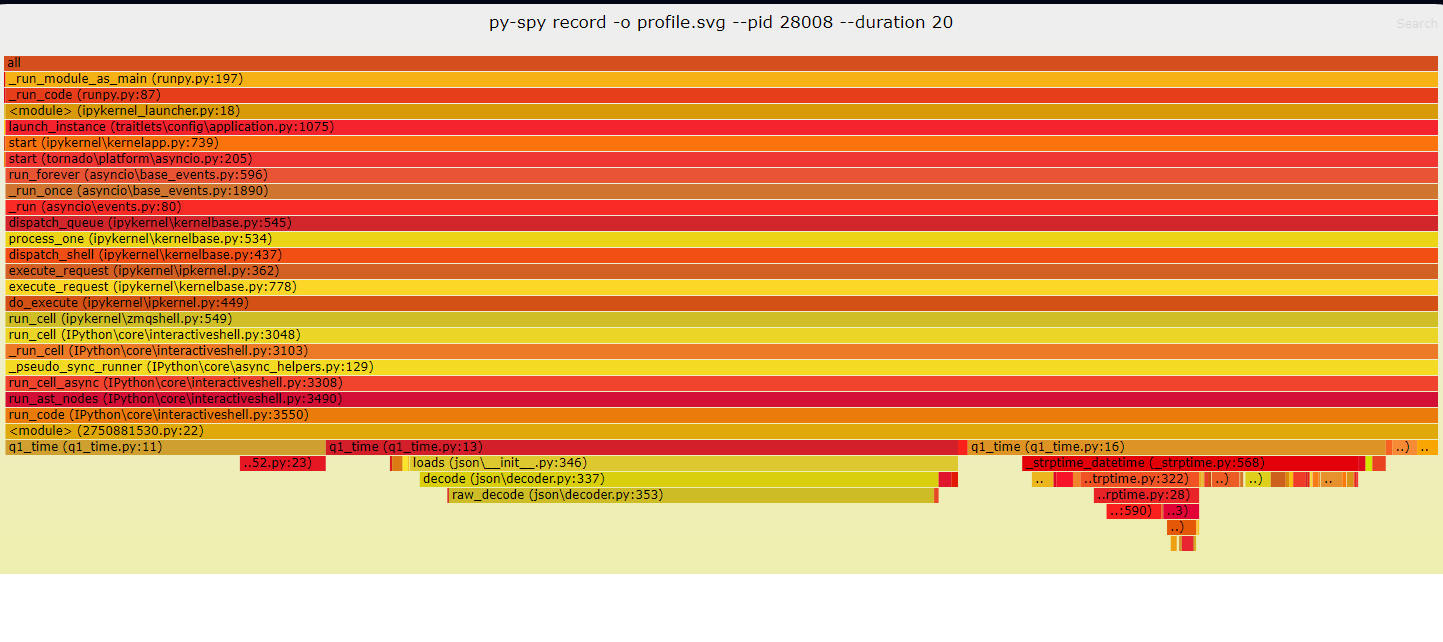

Obervaciones:

Ejecución de q1_time:
El gráfico muestra que se llama a q1_time (visto en q1_time (q1_time.py:11) y q1_time (q1_time.py:16)).
La función incluye operaciones como el análisis JSON (json.loads) y la conversión de fechas (datetime.strptime).

Operaciones que Consumen Tiempo:
Análisis JSON:
Funciones como loads (json/__init__.py:346), decode (json/decoder.py:337), y raw_decode (json/decoder.py:353) indican operaciones de análisis JSON. El tiempo invertido aquí sugiere que el análisis de los datos JSON es una parte significativa del tiempo de ejecución de la función.

Análisis de Fechas:
Funciones como _strptime_datetime (_strptime.py:568) y _strptime.py:322 indican el tiempo invertido en convertir cadenas de fechas a objetos datetime. Esta es otra área donde se consume un tiempo significativo.
